In [65]:
import json
import csv
import pandas as pd
from pandas import DataFrame, Series
import dateutil.parser
from dateutil.tz import gettz
import datetime
import pytz
from functools import reduce

In [66]:
tone_names = ['Sadness', 'Analytical', 'Joy', 'Fear', 'Tentative', 'Anger', 'Confident']
tone_names

['Sadness', 'Analytical', 'Joy', 'Fear', 'Tentative', 'Anger', 'Confident']

In [77]:
#keylogger DF

def roundTime(dt):
    dt = dt - datetime.timedelta(minutes=dt.minute, seconds=dt.second, microseconds=dt.microsecond)
    return dt

with open('../keylogger/logs/log_new.json', 'r') as f:
    keyloggerData = json.load(f)

tzinfos = { "EDT" : gettz("America/New_York") }

def extract_keyloggerData(data):
    results = []

    for d in data:
        result = [0]*(len(tone_names) + 1)
        tones = d['document_tone']['tones']
        for i in range(len(tones)):
            score = tones[i]['score']
            tone_name = tones[i]['tone_name']
            tone_index = tone_names.index(tone_name)
            result[tone_index] = score            

        time = dateutil.parser.parse(d['time'] + " EDT", tzinfos=tzinfos)
        result[-1] = time
        results.append(tuple(result))
    return results

keyloggerDF = DataFrame(extract_keyloggerData(keyloggerData),
                        columns=[tone_name+"_score" for tone_name in tone_names] + ['time'])
#keyloggerDF.time = keyloggerDF.time.apply(roundTime)
#keyloggerDF.time.apply(roundTime)
keyloggerDF

,Sadness_score,Analytical_score,Joy_score,Fear_score,Tentative_score,Anger_score,Confident_score,time
0,0.000000,0.000000,0.638807,0.000000,0.000000,0.000000,0.667008,2018-03-07 22:52:33.301586-05:00
1,0.000000,0.000000,0.535479,0.000000,0.000000,0.000000,0.000000,2018-03-07 23:52:33.926227-05:00
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-03-08 00:52:34.524265-05:00
3,0.000000,0.000000,0.594168,0.000000,0.000000,0.000000,0.000000,2018-03-08 01:52:35.028535-05:00
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.780034,2018-03-08 08:52:37.222100-05:00
5,0.000000,0.000000,0.567961,0.000000,0.000000,0.000000,0.000000,2018-03-09 14:32:14.569387-05:00
6,0.000000,0.000000,0.577478,0.000000,0.000000,0.000000,0.000000,2018-03-09 15:46:45.864690-05:00
7,0.000000,0.000000,0.579676,0.000000,0.000000,0.555240,0.000000,2018-03-10 01:50:06.965740-05:00
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821033,2018-03-10 21:03:45.471070-05:00
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.878843,2018-03-10 22:03:46.132751-05:00


In [90]:
#affectiva DF

local_tz = gettz('America/New_York')

def utc_to_local(utc_dt):
    return utc_dt.replace(tzinfo=local_tz)

with open('../affectiva/analyses/merged_file.json', 'r') as f:
    affectivaData = json.load(f)

for x in range(0, len(affectivaData)):
    affectivaData[x]['time'] = utc_to_local(datetime.datetime.fromtimestamp((affectivaData[x]['time']/ 1e3)))

affectivaDF = DataFrame(affectivaData)
# affectivaDF.time = affectivaDF.time.apply(roundTime)
# affectivaDF.time.apply(roundTime)
#affectivaDF.emoji = affectivaDF.emoji.apply(lambda x: ",".join(x))
del affectivaDF['emoji']
#affectivaDF.emotions = affectivaDF.emotions.apply(lambda x: ",".join(x))
del affectivaDF['emotions']
affectivaDF

,blinks,max_attention,max_engagement,max_valence,min_attention,min_engagement,min_valence,time
0,2,98.778671,0.608366,0.000000,95.007645,0.079540,-1.742792,2018-04-26 14:39:34.922000-04:00
1,5,98.787048,99.914154,29.274584,68.179085,0.079993,-72.281815,2018-05-01 12:42:42.154000-04:00
2,10,98.786896,56.391422,0.000000,43.494858,0.079138,-50.052887,2018-05-03 09:36:08.163000-04:00
3,8,98.718689,99.919434,0.000000,89.435539,0.079626,-58.658493,2018-05-14 18:01:41.740000-04:00
4,1,98.778847,99.882622,36.034897,93.367775,0.081785,-38.491978,2018-06-04 21:47:39.632000-04:00
5,1,98.783875,99.781586,0.000000,40.514740,0.000000,-23.904726,2018-04-13 13:37:47.068000-04:00
6,18,98.778580,99.919434,85.839043,96.775177,0.080415,-18.714973,2018-04-15 10:19:13.564000-04:00
7,0,98.782219,31.617508,0.000000,95.013878,0.079229,-22.398460,2018-04-15 14:59:22.604000-04:00
8,9,98.767960,49.626522,0.000000,92.278549,0.080189,-19.755705,2018-04-15 19:22:18.111000-04:00
9,0,98.786530,9.790726,0.000000,84.819733,0.079817,-0.357021,2018-04-16 14:21:57.640000-04:00


In [79]:
#mood reporter DF

responsesDF = pd.read_csv("../reporter/responses.tsv", sep='\t', header=0)

timeValues = responsesDF.time.values

for x in range(0, len(timeValues)):
    timeValues[x] = dateutil.parser.parse(timeValues[x] + " EDT", tzinfos=tzinfos)

# responsesData.time = timeValues
#responsesData.time = responsesData.time.apply(roundTime)
#responsesData.time.apply(roundTime)

activity_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.activity.values)])))))

for activity_name in activity_names:
    responsesDF[activity_name.replace(" ", "_") + "_activity"] = responsesDF.activity.apply(lambda x: activity_name in x.lower())

location_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.location.values)])))))

def split_locations(locations):
    return list(map(lambda x: x.lower().strip(), locations.split(",")))

for location_name in location_names:
    responsesDF[location_name.replace(" ", "_") + "_location"] = responsesDF.location.apply(lambda x: location_name in split_locations(x))
    
del responsesDF['moodNotes']
del responsesDF['trigger']
del responsesDF['activity']
del responsesDF['location']

responsesDF

,time,mood,social,alone,morale,stress,fatigue,compulsions,leisure_activity,trying_to_leave_apt_activity,...,email_activity,parents_home_location,home_location,vacation_location,therapy_location,mountain_view_location,library_location,airport_location,school_location,kevin_home_location
0,2018-04-09 10:03:18.315716-04:00,4.0,1,True,4.0,3.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018-04-09 11:03:48.939009-04:00,4.0,1,True,4.0,3.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2018-04-09 12:00:17.159027-04:00,3.0,1,True,3.0,2.0,1.0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,2018-04-09 14:34:53.010916-04:00,3.0,2,True,3.0,2.0,4.0,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,2018-04-09 16:56:31.979721-04:00,3.0,0,True,3.0,2.0,3.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2018-04-09 18:00:51.257329-04:00,3.0,0,True,3.0,2.0,4.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,2018-04-09 19:58:39.830408-04:00,4.0,2,False,3.0,2.0,4.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
7,2018-04-10 02:00:04.219220-04:00,4.0,2,False,4.0,2.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
8,2018-04-10 12:47:00.108283-04:00,3.0,2,False,3.0,3.0,3.0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
9,2018-04-10 13:54:55.984234-04:00,2.0,1,False,2.0,3.0,4.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [70]:
# aloneColumn = responsesDF.alone.values
# alone = []
# for x in range(0, len(aloneColumn)):
#     if (aloneColumn[x] == True):
#         alone.append(1)
#     elif (aloneColumn[x] == False):
#         alone.append(0)
        
# compulsionsColumn = responsesDF.compulsions.values
# compulsions = []
# for x in range(0, len(compulsionsColumn)):
#     if (compulsionsColumn[x] == True):
#         compulsions.append(1)
#     elif(compulsionsColumn[x] == False):
#         compulsions.append(0)

# inClassColumn = responsesDF.in_class_activity.values
# inClass = []
# for x in range(0, len(inClassColumn)):
#     if (inClassColumn[x] == True):
#         inClass.append(1)
#     elif(inClassColumn[x] == False):
#         inClass.append(0)
        
# tvColumn = responsesDF.tv_activity.values
# tv = []
# for x in range(0, len(tvColumn)):
#     if (tvColumn[x] == True):
#         tv.append(1)
#     elif(tvColumn[x] == False):
#         tv.append(0)
        
# ashColumn = responsesDF.ash_stuff_activity.values
# ash = []
# for x in range(0, len(ashColumn)):
#     if (ashColumn[x] == True):
#         ash.append(1)
#     elif(ashColumn[x] == False):
#         ash.append(0)
        
# libraryColumn = responsesDF.library_location.values
# library = []
# for x in range(0, len(libraryColumn)):
#     if (libraryColumn[x] == True):
#         library.append(1)
#     elif(libraryColumn[x] == False):
#         library.append(0)
        
# newResponsesDF = responsesDF

# t_f = ["home_location", "mountain_view_location", "kevin_home_location", "parents_home_location", "vacation_location", "school_location", "therapy_location", "resting_activity", "with_kevin_activity", "getting_ready_activity", "email_activity", "working_out_activity", "work_activity", "with_k_activity", "studying_activity", "schoolwork_activity", "workshop_activity", "working_activity", "eating_activity", "commuting_activity", "feedly_activity", "reading_activity", "washing_up_activity", "just_woke_up_activity", "shopping_activity", "school_work_activity", "chatting_activity", "trying_to_leave_apt_activity", "with_parents_activity", "therapy_activity", "leisure_activity", "cooking_activity", "errands_activity", "with_friends_activity"]

# for x in range(0, len(t_f)):
#     print(newResponsesDF[t_f[x]])
#     column = responsesDF[t_f[x]].values
#     holder = []
#     for x in range(0, len(column)):
#         if(column[x] == True):
#             holder.append(1)
#         elif(column[x] == False):
#             holder.append(0)
#     newResponsesDF[t_f[x]] = holder

# newResponsesDF.alone = alone
# newResponsesDF.compulsions = compulsions
# newResponsesDF.in_class_activity = inClass
# newResponsesDF.tv_activity = tv
# newResponsesDF.ash_stuff_activity = ash
# newResponsesDF.library_location = library

# newResponsesDF

In [71]:
#productivity DF

with open('../getAPIdata/productivity.json', 'r') as f:
    productivityFile = json.load(f)

productivityData = productivityFile['rows']

final_productivityData = [];

for x in range(0, len(productivityData)):
    if(productivityData[x][0] > '2018-04-01T90:00:00'):
        time = dateutil.parser.parse(productivityData[x][0] + " EDT", tzinfos=tzinfos)
        prod_score = productivityData[x][4]
        final_productivityData.append((time, prod_score))

productivityDF = DataFrame(final_productivityData, columns=['time', 'productivity_score'])
#productivityDF.time = productivityDF.time.apply(roundTime)
#productivityDF.time.apply(roundTime)

productivityDF

,time,productivity_score
0,2018-04-02 00:00:00-04:00,37.59
1,2018-04-02 01:00:00-04:00,41.02
2,2018-04-02 02:00:00-04:00,52.69
3,2018-04-02 03:00:00-04:00,18.75
4,2018-04-02 04:00:00-04:00,99.68
5,2018-04-02 05:00:00-04:00,93.81
6,2018-04-02 06:00:00-04:00,0.00
7,2018-04-02 07:00:00-04:00,4.16
8,2018-04-02 09:00:00-04:00,0.00
9,2018-04-02 11:00:00-04:00,39.22


In [91]:
# merge all the data

mergedData = []

all_columns = list(responsesDF.columns) + list(keyloggerDF.columns.drop('time')) + list(affectivaDF.columns.drop('time')) + list(productivityDF.columns.drop('time'))

def process_row(row):
    current_time = row['time']

    output_values = list(row.values)

    for other_df in [keyloggerDF, affectivaDF, productivityDF]:
        candidates = other_df[(current_time > other_df['time']) &
                              (current_time - other_df['time'] < datetime.timedelta(hours=3))]
        if candidates.empty:
            return None
        else:
            index_of_max = candidates['time'].argmax()
            candidate = candidates.ix[index_of_max].drop('time')
            output_values += list(candidate.values)
    return output_values

for index, row in responsesDF.iterrows():
    processed_row = process_row(row)
    if processed_row is not None:
        mergedData.append(processed_row)

mergedDF = DataFrame(mergedData, columns = all_columns)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [81]:
mergedDF.fillna(0)

,time,mood,social,alone,morale,stress,fatigue,compulsions,leisure_activity,trying_to_leave_apt_activity,...,Anger_score,Confident_score,blinks,max_attention,max_engagement,max_valence,min_attention,min_engagement,min_valence,productivity_score
0,2018-04-12 13:40:07.405005-04:00,2.0,0,True,2.0,4.0,2.0,False,False,False,...,0.000000,0.000000,1,98.785469,99.793770,0.000000,79.901894,0.080212,-66.790077,88.91
1,2018-04-12 14:42:51.922735-04:00,2.0,0,True,3.0,4.0,2.0,False,False,False,...,0.000000,0.000000,1,98.786980,16.004782,0.000000,97.623177,0.079446,0.000000,96.85
2,2018-04-12 16:47:51.900184-04:00,2.0,0,True,2.0,4.0,3.0,False,False,False,...,0.000000,0.000000,1,98.786980,16.004782,0.000000,97.623177,0.079446,0.000000,74.06
3,2018-04-12 17:57:38.743968-04:00,3.0,1,False,3.0,2.0,3.0,False,False,False,...,0.000000,0.000000,0,98.782661,99.917702,0.000000,72.947754,0.079563,-54.905159,74.71
4,2018-04-12 21:00:10.756322-04:00,3.0,1,False,3.0,2.0,4.0,False,True,False,...,0.000000,0.000000,0,98.786964,61.554737,0.000000,95.048782,0.079478,-18.393677,30.96
5,2018-04-13 15:27:43.578694-04:00,4.0,0,True,4.0,2.0,3.0,False,True,False,...,0.000000,0.000000,1,98.783875,99.781586,0.000000,40.514740,0.000000,-23.904726,54.52
6,2018-04-13 16:29:00.230369-04:00,3.0,1,True,3.0,2.0,3.0,True,False,False,...,0.000000,0.000000,1,98.783875,99.781586,0.000000,40.514740,0.000000,-23.904726,84.55
7,2018-04-14 16:22:02.472148-04:00,4.0,1,False,4.0,3.0,2.0,False,True,False,...,0.000000,0.000000,0,98.781746,99.920860,99.891769,39.824993,58.210773,0.000000,96.99
8,2018-04-14 17:32:10.595708-04:00,4.0,1,False,4.0,2.0,2.0,True,False,False,...,0.000000,0.000000,0,98.776100,99.920952,0.000000,85.642471,25.051722,-55.493454,96.99
9,2018-04-15 16:52:01.287242-04:00,4.0,1,False,4.0,3.0,2.0,True,False,False,...,0.000000,0.000000,0,98.782219,31.617508,0.000000,95.013878,0.079229,-22.398460,95.98


In [92]:
mergedDF.to_csv("mergedDF.csv", sep='\t', encoding='utf-8')

In [93]:
corr = mergedDF.corr().fillna(0)
corr

,mood,social,alone,morale,stress,fatigue,compulsions,leisure_activity,trying_to_leave_apt_activity,feedly_activity,...,Anger_score,Confident_score,blinks,max_attention,max_engagement,max_valence,min_attention,min_engagement,min_valence,productivity_score
mood,1.000000,0.325198,-0.268890,0.674854,-0.162496,-0.225998,-0.119163,-0.055974,0.0,-1.248779e-01,...,-0.130939,0.019897,-0.163970,-0.039277,-0.008819,0.003587,-0.006114,0.125523,-0.008376,0.139052
social,0.325198,1.000000,-0.427627,0.153358,0.039537,0.056214,-0.091043,-0.045293,0.0,-8.981352e-03,...,0.036337,-0.028084,-0.060868,-0.170255,0.172088,0.126348,-0.152797,-0.008532,-0.131172,-0.043205
alone,-0.268890,-0.427627,1.000000,-0.144622,-0.312140,-0.240410,-0.015385,0.133631,0.0,1.669451e-01,...,-0.026231,0.090029,0.210181,0.086220,-0.138780,-0.202836,0.286204,-0.139178,0.083316,-0.271593
morale,0.674854,0.153358,-0.144622,1.000000,-0.191791,-0.429483,-0.003302,-0.173079,0.0,-2.336114e-01,...,-0.119654,0.076532,-0.102581,0.009097,0.022308,-0.130546,0.053942,0.116031,-0.012665,0.265999
stress,-0.162496,0.039537,-0.312140,-0.191791,1.000000,0.322569,0.002543,-0.300578,0.0,-1.320410e-01,...,0.007930,-0.124705,-0.135371,-0.092903,-0.126051,0.082398,-0.196194,0.079892,0.132055,0.397811
fatigue,-0.225998,0.056214,-0.240410,-0.429483,0.322569,1.000000,-0.054362,-0.070663,0.0,1.485962e-02,...,0.035938,0.044451,0.031534,0.070316,0.101386,0.134850,-0.047420,-0.070374,0.021725,0.037279
compulsions,-0.119163,-0.091043,-0.015385,-0.003302,0.002543,-0.054362,1.000000,0.003941,0.0,4.674464e-02,...,-0.029015,0.059791,-0.069301,-0.101084,0.075570,0.025382,-0.021010,0.006622,-0.093221,0.197909
leisure_activity,-0.055974,-0.045293,0.133631,-0.173079,-0.300578,-0.070663,0.003941,1.000000,0.0,8.164011e-02,...,-0.030222,-0.050402,0.064104,-0.105743,-0.014128,-0.037279,-0.005373,0.063712,0.090221,-0.392396
trying_to_leave_apt_activity,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
feedly_activity,-0.124878,-0.008981,0.166945,-0.233611,-0.132041,0.014860,0.046745,0.081640,0.0,1.000000e+00,...,0.038713,0.008657,0.148532,0.022999,0.118411,0.164194,0.012514,-0.022577,-0.077067,-0.185373


In [89]:
import matplotlib
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(mergedDF, figsize=(88, 88))
plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [16]:
# plt.figure(figsize=(88,88))
# plt.matshow(mergedDF.corr())
# plt.xticks(range(len(mergedDF.columns)), mergedDF.columns)
# plt.yticks(range(len(mergedDF.columns)), mergedDF.columns)
# plt.colorbar()
# plt.show()

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '30px', 'min-width': '60px', 'min-height': '60px', 'max-height': '60px', 'font-size': '8pt', 'padding': '1em 1em'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
#     .set_table_styles(magnify())

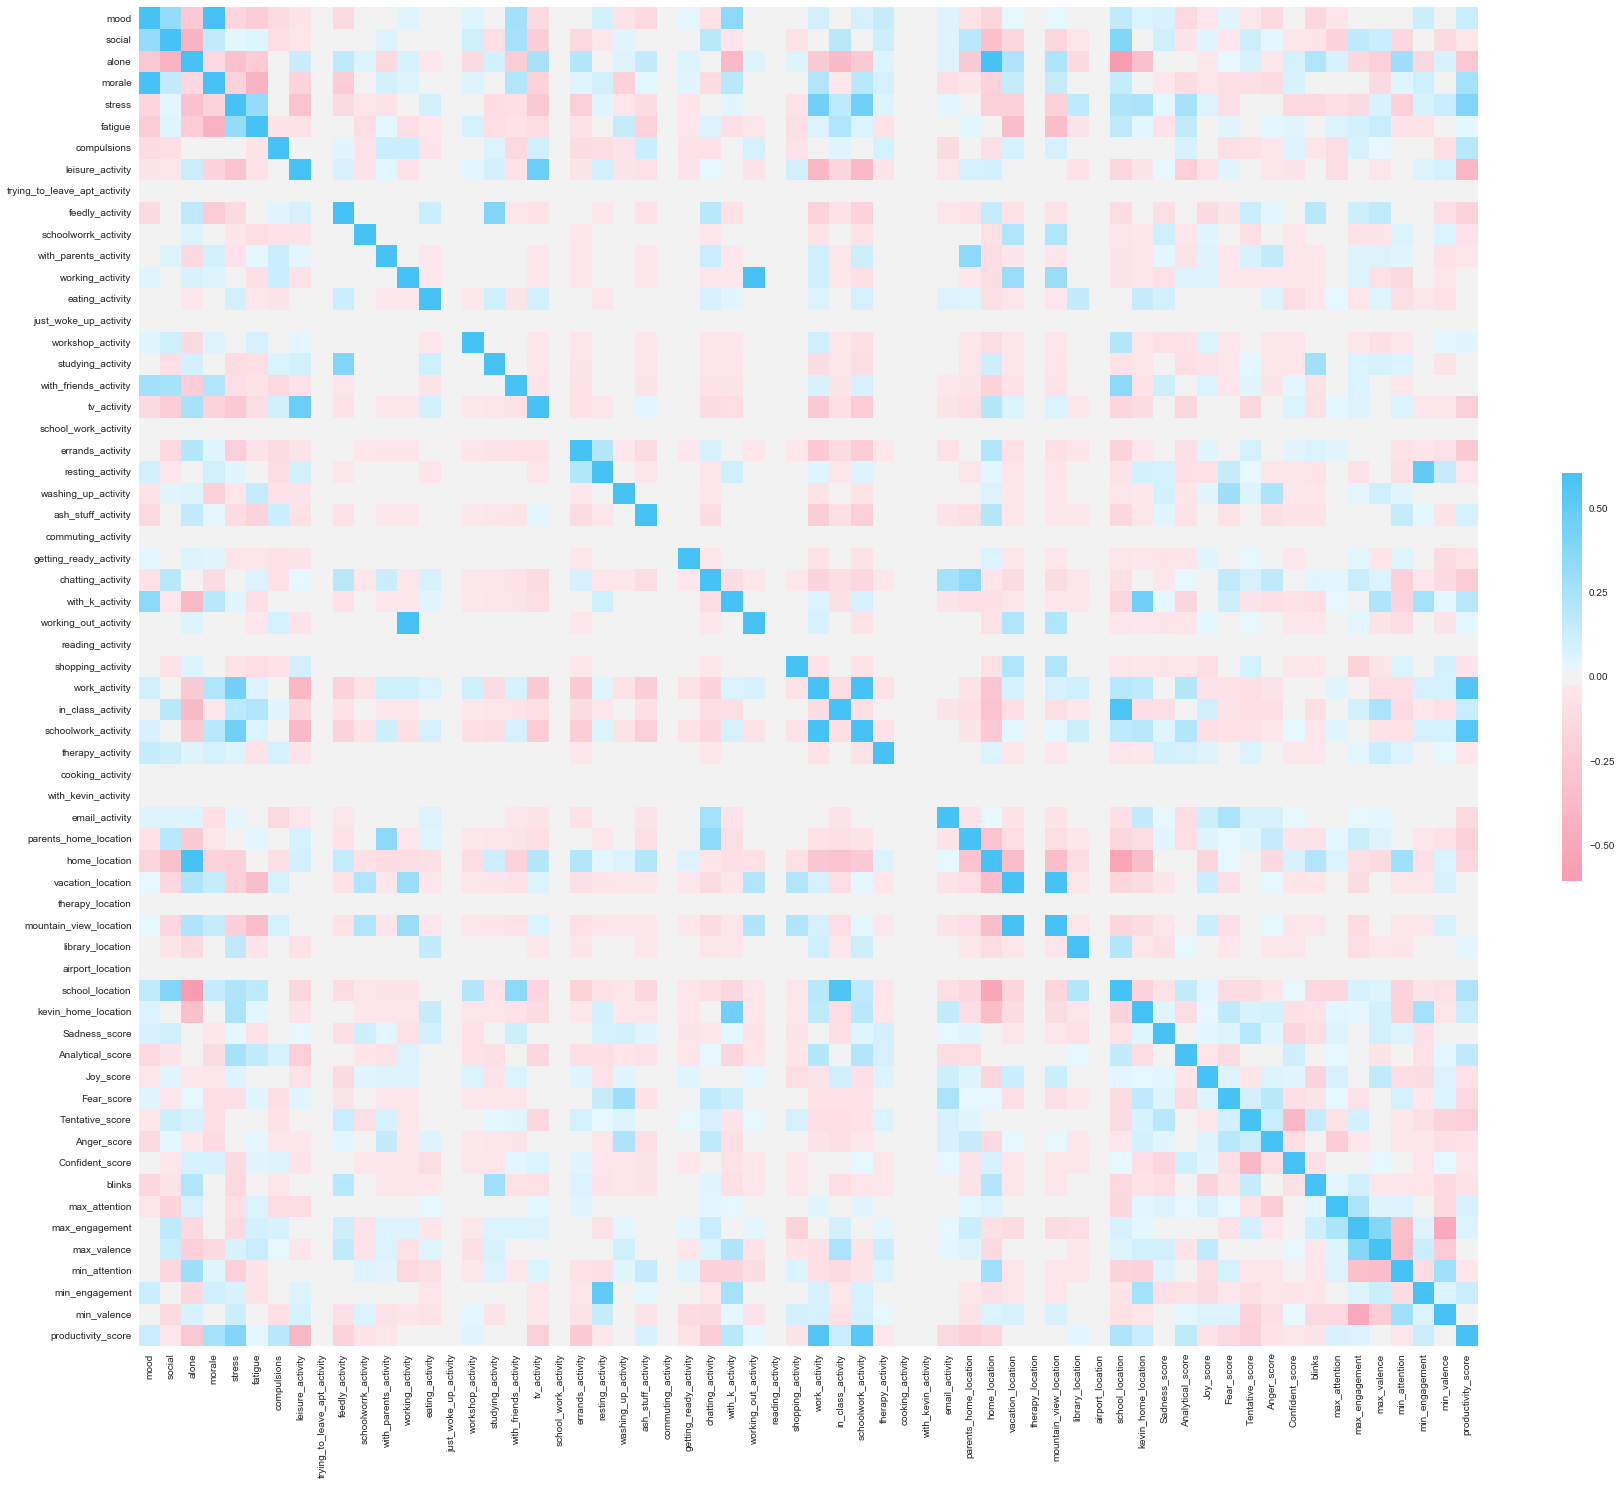

In [85]:
import seaborn as sns
%matplotlib inline

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# ax.set_axis_bgcolor("white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(359, 230, s=88, l=74, sep=10, n=9, as_cmap=True)
sns.set_style("white")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0, cbar_kws={"shrink": 0.3})

Widget Javascript not detected.  It may not be installed or enabled properly.


[array([ 0.25199714,  0.49873371,  0.57516028,  1.        ]),
 array([ 0.43026136,  0.62000665,  0.67878019,  1.        ]),
 array([ 0.60852558,  0.74127959,  0.7824001 ,  1.        ]),
 array([ 0.7867898 ,  0.86255253,  0.88602001,  1.        ]),
 array([ 0.95,  0.95,  0.95,  1.  ]),
 array([ 0.95457726,  0.76653099,  0.78032569,  1.        ]),
 array([ 0.91971827,  0.58735877,  0.61174   ,  1.        ]),
 array([ 0.88485928,  0.40818655,  0.44315432,  1.        ]),
 array([ 0.85104086,  0.23436275,  0.27960104,  1.        ])]

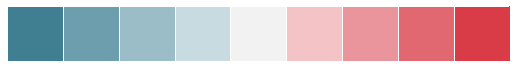

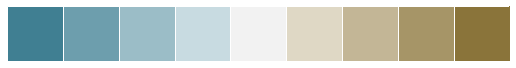

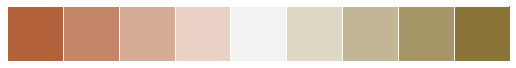

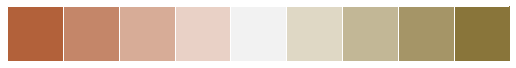

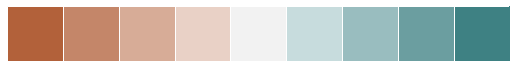

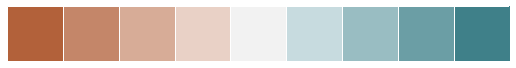

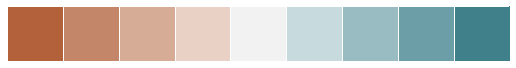

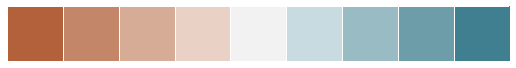

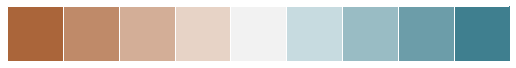

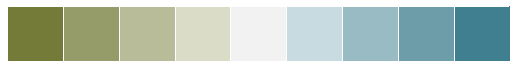

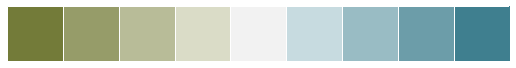

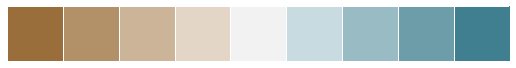

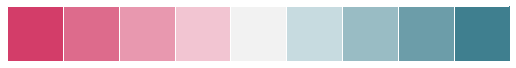

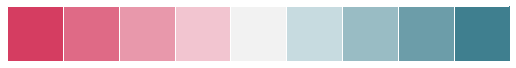

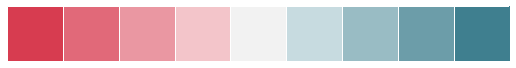

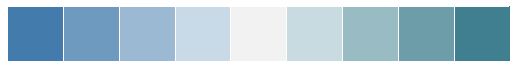

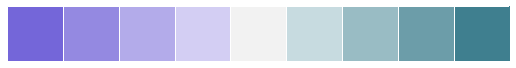

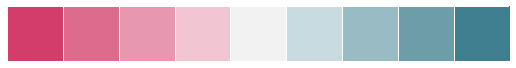

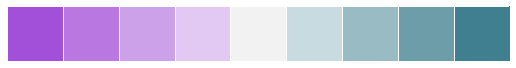

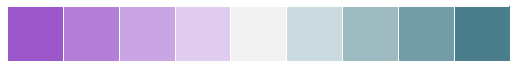

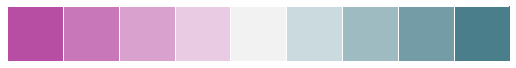

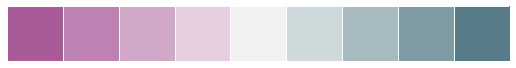

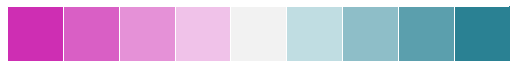

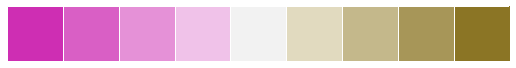

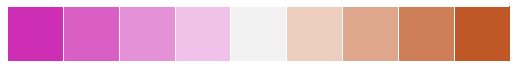

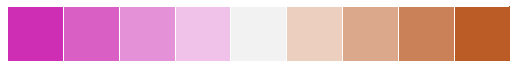

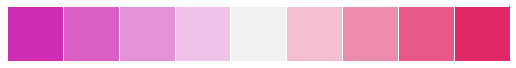

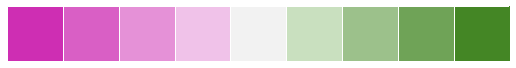

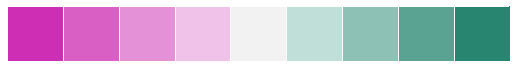

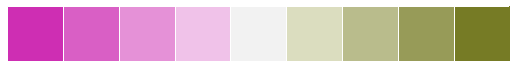

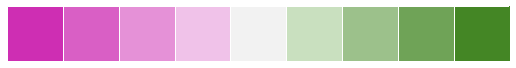

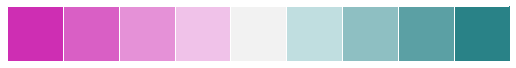

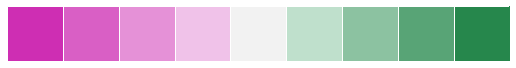

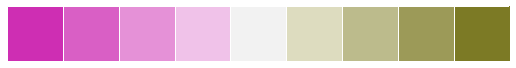

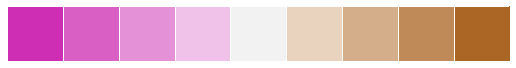

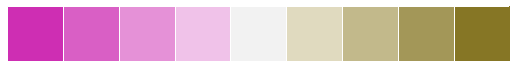

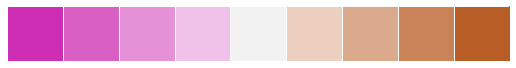

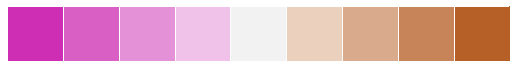

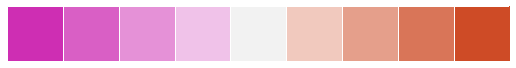

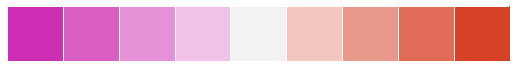

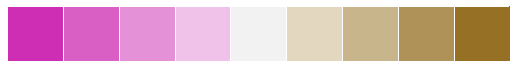

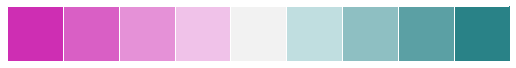

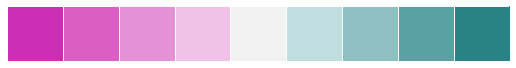

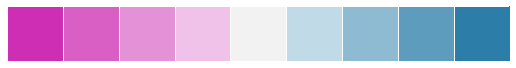

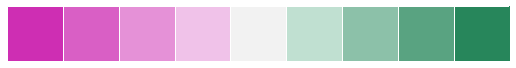

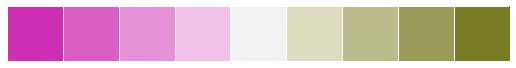

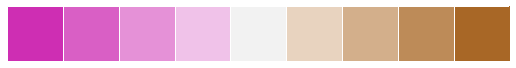

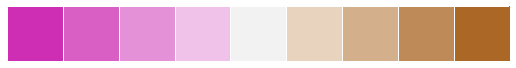

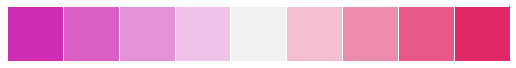

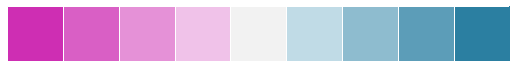

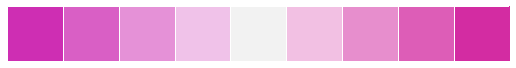

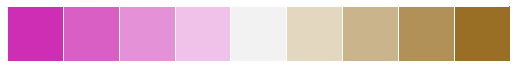

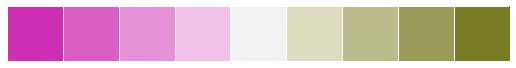

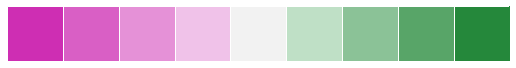

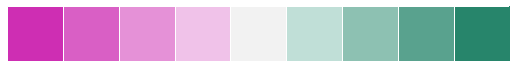

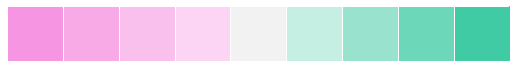

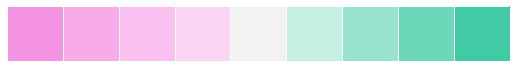

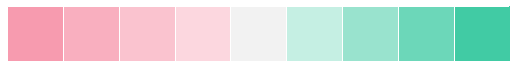

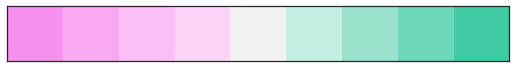

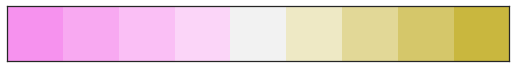

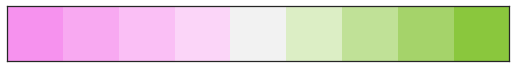

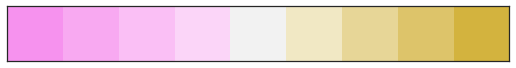

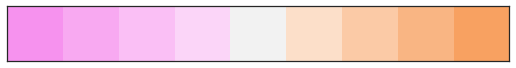

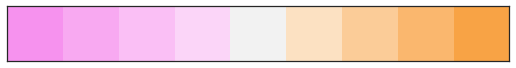

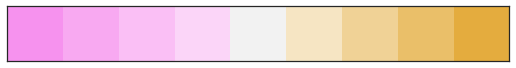

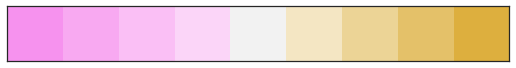

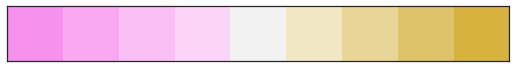

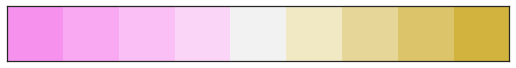

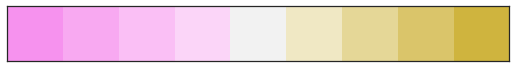

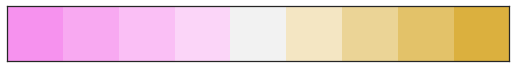

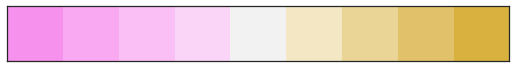

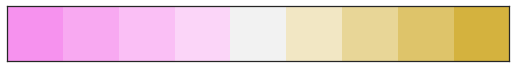

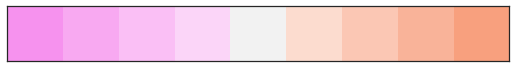

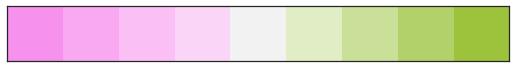

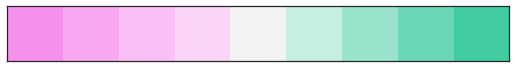

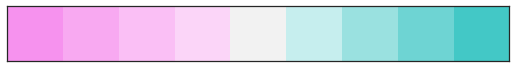

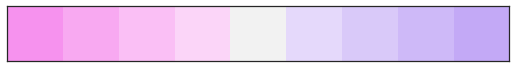

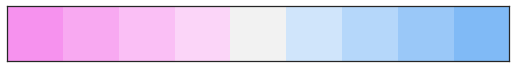

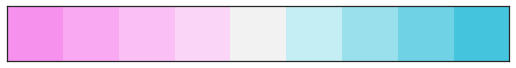

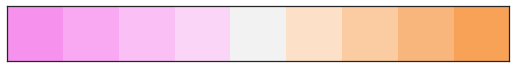

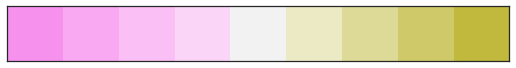

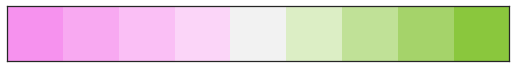

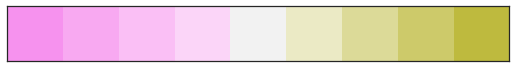

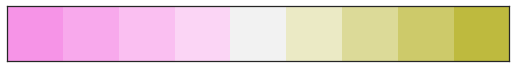

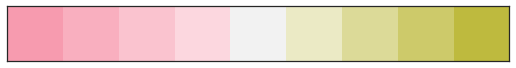

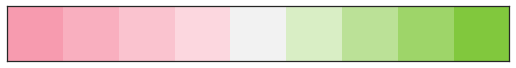

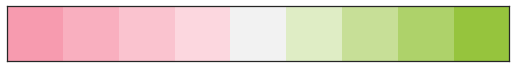

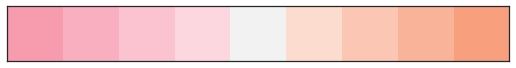

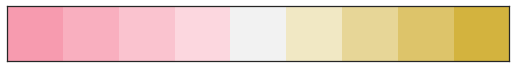

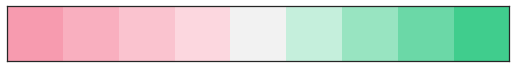

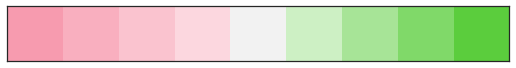

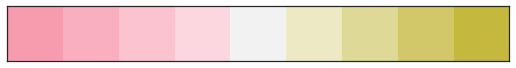

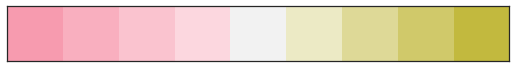

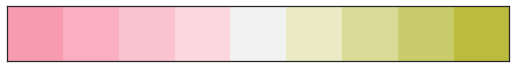

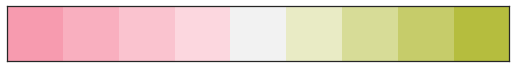

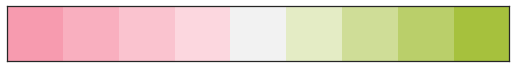

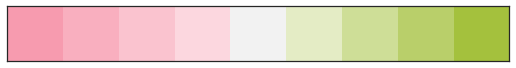

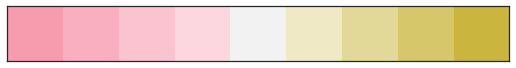

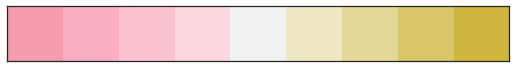

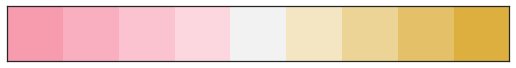

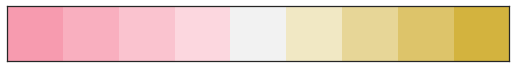

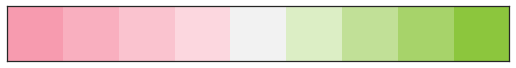

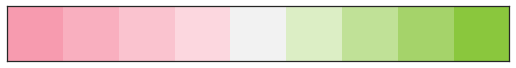

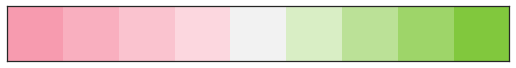

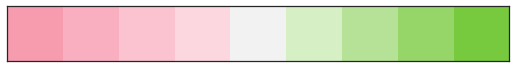

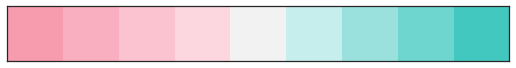

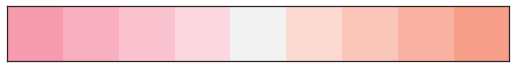

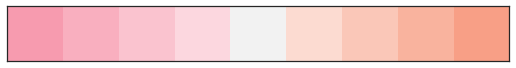

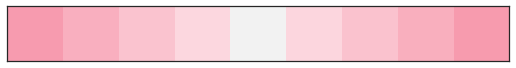

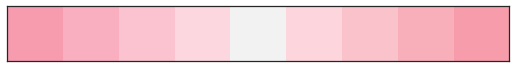

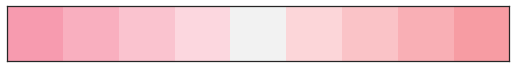

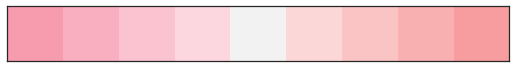

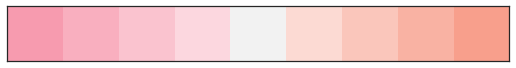

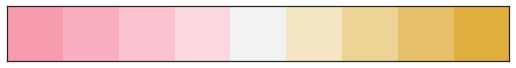

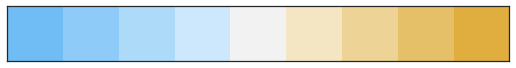

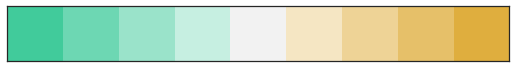

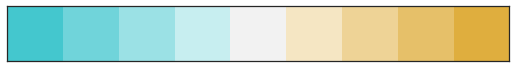

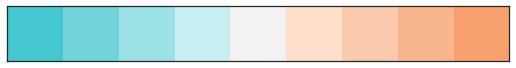

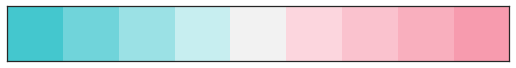

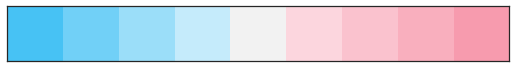

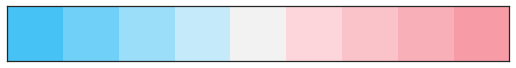

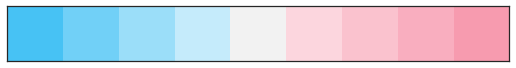

In [1]:
import seaborn as sns
%matplotlib inline

sns.choose_diverging_palette()

In [87]:
mergedDF.corr().mood.sort_values(ascending=False)

mood                            1.000000
morale                          0.674854
with_k_activity                 0.350661
social                          0.325198
with_friends_activity           0.269952
school_location                 0.163414
therapy_activity                0.144541
productivity_score              0.139052
min_engagement                  0.125523
work_activity                   0.105461
resting_activity                0.095899
schoolwork_activity             0.086917
Sadness_score                   0.076585
kevin_home_location             0.074047
email_activity                  0.059769
workshop_activity               0.052724
working_activity                0.052724
Fear_score                      0.045849
getting_ready_activity          0.037184
mountain_view_location          0.027968
vacation_location               0.027968
Confident_score                 0.019897
with_parents_activity           0.014668
in_class_activity               0.005624
max_valence     

In [79]:
mergedDF.columns
featuresList = ['errands_activity', 'resting_activity',
       'schoolwork_activity', 'therapy_activity', 'school_work_activity',
       'just_woke_up_activity', 'ash_stuff_activity', 'workshop_activity',
       'leisure_activity', 'eating_activity', 'email_activity',
       'with_k_activity', 'reading_activity', 'commuting_activity',
       'chatting_activity', 'with_friends_activity', 'in_class_activity',
       'kevin_home_location', 'school_location', 'library_location',
       'home_location', 'therapy_location', 'Sadness_score',
       'Analytical_score', 'Joy_score', 'Fear_score', 'Tentative_score',
       'Anger_score', 'Confident_score', 'blinks', 'max_attention',
       'max_engagement', 'max_valence', 'min_attention', 'min_engagement',
       'min_valence', 'productivity_score']

In [19]:
from sklearn import linear_model
y = mergedDF["mood"]
X = mergedDF[featuresList]
myLinearModel = linear_model.LinearRegression()
myLinearModel = myLinearModel.fit(X, y)

In [20]:
myLinearModel.predict(X)

array([ 3.34966644,  3.25418563,  2.92897186,  3.51947185,  3.23720356,
        3.64364741,  3.02240773,  4.35635259,  3.19967764,  3.08629499,
        3.02095731,  2.97904269,  2.55297141,  2.68778597,  2.73346535,
        4.29245096,  3.31478842,  2.05171287,  2.85059968,  2.45478664,
        2.82860597,  2.44109794,  2.52811779,  2.96212304,  3.03048166,
        3.22321251,  2.88304321,  3.19048768,  3.58700599,  2.95130909,
        2.9928887 ,  3.09212568,  2.93685284,  2.81785792,  2.95721105,
        3.14185567,  3.37195066,  3.18137543,  3.39574444,  3.63451255,
        3.1430756 ,  4.5       ,  3.53131386,  2.48725814,  2.82473219,
        3.50465616,  3.35937457,  3.33267039,  2.93820176,  3.15916725,
        3.94668151,  3.41335555,  2.99423867,  2.89620857,  2.88964413,
        3.74505707,  4.21996707,  3.25494293,  2.70158998,  3.77124331,
        2.79981593,  3.16371665,  3.98366785,  3.8121597 ,  3.18706258,
        3.40744308,  3.15469313,  3.30692634,  3.25854927,  4.28

In [21]:
y.values

array([ 2. ,  2. ,  2. ,  3. ,  3. ,  4. ,  3. ,  4. ,  4. ,  4. ,  3. ,
        3. ,  2. ,  3. ,  1.5,  5. ,  4. ,  1. ,  2. ,  1.5,  3. ,  2. ,
        2.5,  3. ,  3. ,  3. ,  3. ,  2.5,  3. ,  3. ,  2.5,  3. ,  3. ,
        2.5,  3. ,  2.5,  3. ,  3.5,  3.5,  4. ,  4.5,  4.5,  4. ,  3.5,
        3. ,  3.5,  2.5,  5. ,  3.5,  3. ,  3.5,  2.5,  2.5,  3. ,  3.5,
        4. ,  4.5,  3. ,  3. ,  4. ,  3.5,  3. ,  4. ,  4. ,  3.5,  3. ,
        3. ,  2.5,  4. ,  4.5,  3.5,  4. ,  3.5,  4. ,  4. ,  4.5,  3. ,
        3.5,  4. ,  3. ,  3.5,  4. ,  3. ,  3.5,  3.5,  3. ,  4.5,  3.5,
        3. ,  3. ,  1.5,  2. ,  3. ,  1. ,  3. ,  3. ,  3.5,  4. ,  4. ,
        2.5,  2.5,  3. ,  4. ,  3.5,  3. ,  3. ,  3.5,  3. ,  3. ,  3. ,
        3. ,  3.5,  3.5,  3.5,  3. ,  4.5,  4. ,  4.5,  4. ,  3. ,  2.5,
        3. ,  4. ,  3. ,  3. ,  3. ,  4. ,  3.5,  3.5,  3. ])

In [23]:
import numpy as np
np.set_printoptions(suppress=True)
list(zip(featuresList,np.round(model.coef_, 3)))

NameError: name 'featuresList' is not defined

In [23]:
from sklearn import tree
y = mergedDF["mood"]
X = mergedDF[featuresList]
decision_tree = tree.DecisionTreeRegressor()
decision_tree = decision_tree.fit(X, y)

In [24]:
decision_tree.feature_importances_
list(zip(featuresList,np.round(model.feature_importances_, 3)))

NameError: name 'model' is not defined

In [25]:
X.iloc[0].values

array([False, False, True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, True, False, 0.531304, 0.62075499999999995, 0.0, 0.0,
       0.61978200000000006, 0.0, 0.0, 1, 98.785469055175781,
       99.793769836425781, 0.0, 79.901893615722656, 0.080211766064167023,
       -66.790077209472656, 88.909999999999997], dtype=object)

In [26]:
print("\n".join(str(x)+", # " +y for x,y in zip(X.iloc[0].values,featuresList)))

False, # errands_activity
False, # resting_activity
True, # schoolwork_activity
False, # therapy_activity
False, # school_work_activity
False, # just_woke_up_activity
False, # ash_stuff_activity
False, # workshop_activity
False, # leisure_activity
False, # eating_activity
False, # email_activity
False, # with_k_activity
False, # reading_activity
False, # commuting_activity
False, # chatting_activity
False, # with_friends_activity
False, # in_class_activity
False, # kevin_home_location
False, # school_location
False, # library_location
True, # home_location
False, # therapy_location
0.531304, # Sadness_score
0.620755, # Analytical_score
0.0, # Joy_score
0.0, # Fear_score
0.619782, # Tentative_score
0.0, # Anger_score
0.0, # Confident_score
1, # blinks
98.7854690552, # max_attention
99.7937698364, # max_engagement
0.0, # max_valence
79.9018936157, # min_attention
0.0802117660642, # min_engagement
-66.7900772095, # min_valence
88.91, # productivity_score


In [27]:
fakehappyX = [False, # errands_activity
True, # resting_activity
False, # schoolwork_activity
True, # therapy_activity
False, # school_work_activity
False, # just_woke_up_activity
False, # ash_stuff_activity
False, # workshop_activity
True, # leisure_activity
True, # eating_activity
False, # email_activity
True, # with_k_activity
False, # reading_activity
False, # commuting_activity
True, # chatting_activity
False, # with_friends_activity
False, # in_class_activity
True, # kevin_home_location
False, # school_location
False, # library_location
False, # home_location
False, # therapy_location
0.0, # Sadness_score
0.0, # Analytical_score
99.0, # Joy_score
0.0, # Fear_score
0.0, # Tentative_score
0.0, # Anger_score
0.0, # Confident_score
2, # blinks
98.7772064209, # max_attention
90.76793289185, # max_engagement
90.0, # max_valence
95.8359222412, # min_attention
90.0814501345158, # min_engagement
20.81201314926, # min_valence
90.14] # productivity_score

In [28]:
model.predict([fakehappyX])

NameError: name 'model' is not defined

In [29]:
fakeSadX = [True, # errands_activity
False, # resting_activity
True, # schoolwork_activity
False, # therapy_activity
True, # school_work_activity
False, # just_woke_up_activity
True, # ash_stuff_activity
False, # workshop_activity
False, # leisure_activity
False, # eating_activity
False, # email_activity
False, # with_k_activity
False, # reading_activity
True, # commuting_activity
False, # chatting_activity
False, # with_friends_activity
False, # in_class_activity
False, # kevin_home_location
True, # school_location
False, # library_location
False, # home_location
False, # therapy_location
99.0, # Sadness_score
0.0, # Analytical_score
0.0, # Joy_score
70.0, # Fear_score
40.0, # Tentative_score
60.0, # Anger_score
0.0, # Confident_score
20, # blinks
70.7772064209, # max_attention
20.76793289185, # max_engagement
-40.0, # max_valence
65.8359222412, # min_attention
10.0814501345158, # min_engagement
-90.81201314926, # min_valence
40.14] # productivity_score

In [30]:
model.predict([fakeSadX])

NameError: name 'model' is not defined

In [31]:
myLinearModel.predict([fakehappyX])

array([-35.75575945])

In [32]:
from sklearn.model_selection import train_test_split

#set aside 20% of the data to use as test data; the rest will be used as training date
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

#train a linear model on the training data
myLinearModel = linear_model.LinearRegression()
myLinearModel = myLinearModel.fit(X_train, y_train)

#predict on test data and print the results
y_pred_lm = myLinearModel.predict(X_test)
y_pred_lm

array([ 3.50873278,  3.04157036,  2.85641466,  3.08439199,  4.06597294,
        3.78556169,  3.97697725,  3.39680691,  4.28618067,  3.21375158,
        3.38934128,  3.64384401,  2.928347  ,  3.03122573,  3.03479786,
        3.19375283,  3.38554007,  3.05082032,  3.52674912,  2.75888344,
        3.59825582,  3.35109325,  2.79548618,  3.34122576,  4.06407361,
        3.11030194])

In [33]:
#calculate the mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred_lm)

0.64985261070074773

In [34]:
#train a decision tree on the training data
decision_tree = tree.DecisionTreeRegressor()
decision_tree = decision_tree.fit(X_train, y_train)

#predict on test data and print the results
y_pred_dt = decision_tree.predict(X_test)
y_pred_dt

array([ 3. ,  3. ,  1. ,  4.5,  4. ,  4. ,  4. ,  3. ,  4. ,  2. ,  4. ,
        3. ,  3.5,  4. ,  3.5,  3. ,  3.5,  4. ,  3. ,  3. ,  1. ,  4. ,
        3. ,  3. ,  4. ,  5. ])

In [35]:
#calculate the decision tree's mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred_dt)

0.69230769230769229

In [36]:
#train a random forest on the training data
from sklearn import ensemble
random_forest = ensemble.RandomForestRegressor()
random_forest = random_forest.fit(X_train, y_train)

#predict on the test data and print the results
y_pred_rf = random_forest.predict(X_test)
y_pred_rf

array([ 3.3 ,  3.25,  2.8 ,  3.6 ,  3.95,  3.65,  3.55,  2.9 ,  3.85,
        2.85,  3.15,  3.  ,  3.4 ,  3.35,  2.95,  2.9 ,  3.3 ,  4.  ,
        3.4 ,  3.35,  2.85,  3.55,  3.45,  2.5 ,  2.75,  3.35])

In [37]:
#calculate the random forest's error
mean_absolute_error(y_test, y_pred_rf)

0.64423076923076905

In [38]:
print("Test values, Random Forest Predictions, Decision Tree Predictions, Linear Model Predictions")
list(zip(y_test, y_pred_rf, y_pred_dt, y_pred_lm))

Test values, Random Forest Predictions, Decision Tree Predictions, Linear Model Predictions


[(4.0, 3.2999999999999998, 3.0, 3.5087327825065979),
 (4.5, 3.25, 3.0, 3.0415703588352039),
 (1.5, 2.7999999999999998, 1.0, 2.8564146562525012),
 (3.0, 3.6000000000000001, 4.5, 3.0843919893011158),
 (4.5, 3.9500000000000002, 4.0, 4.0659729431795455),
 (4.5, 3.6499999999999999, 4.0, 3.7855616876321787),
 (4.5, 3.5499999999999998, 4.0, 3.9769772468944296),
 (3.0, 2.8999999999999999, 3.0, 3.3968069057519705),
 (4.0, 3.8500000000000001, 4.0, 4.2861806718304925),
 (3.0, 2.8500000000000001, 2.0, 3.2137515808791699),
 (3.0, 3.1499999999999999, 4.0, 3.389341283532266),
 (2.5, 3.0, 3.0, 3.6438440101924789),
 (3.5, 3.3999999999999999, 3.5, 2.9283469971901388),
 (3.0, 3.3500000000000001, 4.0, 3.0312257262633411),
 (4.0, 2.9500000000000002, 3.5, 3.0347978647883087),
 (2.5, 2.8999999999999999, 3.0, 3.1937528264686881),
 (3.0, 3.2999999999999998, 3.5, 3.3855400684573498),
 (3.5, 4.0, 4.0, 3.0508203187502456),
 (1.0, 3.3999999999999999, 3.0, 3.5267491175827046),
 (3.5, 3.3500000000000001, 3.0, 2.7588

In [39]:
predictionsDF = DataFrame(list(zip(y_test, y_pred_rf, y_pred_dt, y_pred_lm)), columns=["Test values", "Random Forest Predictions", "Decision Tree Predictions", "Linear Model Predictions"])
predictionsDF


,Test values,Random Forest Predictions,Decision Tree Predictions,Linear Model Predictions
0,4.0,3.30,3.0,3.508733
1,4.5,3.25,3.0,3.041570
2,1.5,2.80,1.0,2.856415
3,3.0,3.60,4.5,3.084392
4,4.5,3.95,4.0,4.065973
5,4.5,3.65,4.0,3.785562
6,4.5,3.55,4.0,3.976977
7,3.0,2.90,3.0,3.396807
8,4.0,3.85,4.0,4.286181
9,3.0,2.85,2.0,3.213752
